# __Adam Optimizer__
- **Issues in Other Optimizers:**
- AdaGrad:

    - **Rapidly Diminishing Learning Rates:** AdaGrad accumulates the squared gradients in the denominator, which can grow large quickly, drastically reducing the learning rates. This often leads to premature convergence, where the algorithm stops making significant progress early in training.

- RMSprop:

    - **Dependence on Initial Settings:** While RMSprop addresses the diminishing learning rate problem of AdaGrad by using a moving average of the squared gradients, its performance heavily relies on the fine-tuning of the decay rate parameter (rho). Incorrect settings can lead to inadequate convergence behaviors, particularly in non-stationary problems.

- Adadelta:

    - **Complex Implementation:** Adadelta extends RMSprop by removing the need for a manually set learning rate. However, its calculation of parameter updates involves recursively calculating exponentially decaying averages of past squared gradients, which adds to the complexity and computational overhead.

- **Strengths of Adam:**

    - **First and Second Moment Estimation:** Adam’s most significant advantage comes from its use of both the first moment (the mean of the gradients, akin to momentum) and the second moment (the uncentered variance of the gradients) of the gradients. This allows Adam to adjust its updates based on both the direction and the magnitude of the gradients, promoting smoother and more effective optimization paths.

    - **Adaptive Learning Rate:** Unlike AdaGrad, which may suffer from excessively small updates, Adam calculates an adaptive learning rate for each parameter. This rate is based on a more stable estimate of the second moments of the gradients, preventing the learning rate from diminishing too quickly.

    - **Bias Correction:** A unique feature of Adam is its mechanism to counteract the biases introduced by initializing the first and second moment estimates as zeros. This correction helps at the start of the optimization when estimates are far from their true expected values, ensuring better and more reliable convergence early in training.

    - **Flexibility and Robustness**: Thanks to its well-balanced approach, Adam performs well across a wide variety of non-convex optimization problems seen in machine learning and deep learning. It is less sensitive to the choice of hyperparameters, particularly the initial learning rate, making it more robust and easier to configure.

## Steps to be followed:
1. Import the required libraries
2. Define and plot the objective function
3. Implement Adam algorithm
4. Optimize the Adam

### Step 1: Import the required libraries

- Import NumPy packages.
- Import the Python package matplotlib, which sets the padding between and around the subplots as well as the figure size.
- Import all other necessary libraries.

In [ ]:
import numpy as np
from math import sqrt
from numpy import asarray, arange, meshgrid
from numpy.random import rand, seed
from matplotlib import pyplot

### Step 2: Define and plot the objective function
- Define the objective function as the sum of squares of x and y.
- Set the bounds for input variables.
- Generate arrays of x and y values within the specified bounds at 0.1 increments.
- Create a mesh grid from the x and y arrays.
- Compute the objective function values for each combination of x and y in the mesh grid.
- Create a filled contour plot with 50 contour levels and 'jet' color scheme.
- Display the plot.



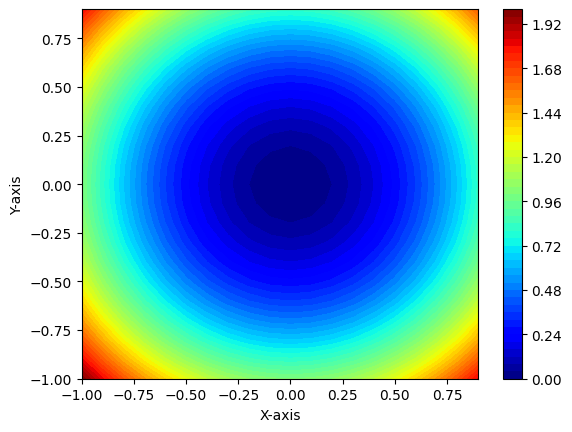

In [ ]:
# Define the Objective Function
def objective(x, y):
    return x**2.0 + y**2.0

# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])

# Plot the objective function contour
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
x, y = meshgrid(xaxis, yaxis)
results = objective(x, y)
pyplot.contourf(x, y, results, levels=50, cmap='jet')
pyplot.colorbar()  # Add a color bar to indicate scale
pyplot.xlabel('X-axis')
pyplot.ylabel('Y-axis')
pyplot.show()

**Observation**:
- The observation for the given code is that the contour plot shows a symmetric bowl-shaped pattern, indicating that the objective function has a minimum point at or near the origin (x = 0, y = 0).
- The color intensity in the plot represents the function's values, with darker regions indicating lower values and lighter regions indicating higher values.





### Step 3: Implement Adam algorithm
- Initialization and Setup:

    - Start by initializing the solution within the specified bounds.
    - Prepare variables m and v to store the first and second moments (moving averages of the gradients and squared gradients).

- Gradient Computation and Update:

    - Calculate the gradient of the objective function.
    - Update the moments using exponential decay rates beta1 and beta2.
    - Adjust each parameter based on the biased-corrected first and second moment estimates.

In [ ]:
# Calculate the derivative of the objective function
def derivative(x, y):
    return asarray([x * 2.0, y * 2.0])


def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
    x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    m = np.zeros_like(x)
    v = np.zeros_like(x)
    for t in range(n_iter):
        g = derivative(x[0], x[1])
        for i in range(len(x)):
            m[i] = beta1 * m[i] + (1 - beta1) * g[i]
            v[i] = beta2 * v[i] + (1 - beta2) * (g[i] ** 2)
            mhat = m[i] / (1 - beta1**(t+1))
            vhat = v[i] / (1 - beta2**(t+1))
            x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
        score = objective(x[0], x[1])
        print('>%d f(%s) = %.5f' % (t, x, score))
    return [x, score]

## Step 4: Optimize the Adam
- Set the random seed to ensure reproducibility.
- Define the bounds for the input variables.
- Specify the number of iterations.
- Set the value of alpha, beta1, and beta2 for the Adam algorithm.
- Apply the Adam algorithm to find the best solution and its corresponding score.
- Print messages indicating the completion of the optimization process.




In [ ]:
seed(1)
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
n_iter = 60
alpha = 0.02
beta1 = 0.8
beta2 = 0.999

best, score = adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2)
print('Done!')
print('f(%s) = %f' % (best, score))

>0 f([-0.14595599  0.42064899]) = 0.19825
>1 f([-0.12613855  0.40070573]) = 0.17648
>2 f([-0.10665938  0.3808601 ]) = 0.15643
>3 f([-0.08770234  0.3611548 ]) = 0.13812
>4 f([-0.06947941  0.34163405]) = 0.12154
>5 f([-0.05222756  0.32234308]) = 0.10663
>6 f([-0.03620086  0.30332769]) = 0.09332
>7 f([-0.02165679  0.28463383]) = 0.08149
>8 f([-0.00883663  0.26630707]) = 0.07100
>9 f([0.00205801 0.24839209]) = 0.06170
>10 f([0.01088844 0.23093228]) = 0.05345
>11 f([0.01759677 0.2139692 ]) = 0.04609
>12 f([0.02221425 0.19754214]) = 0.03952
>13 f([0.02485859 0.18168769]) = 0.03363
>14 f([0.02572196 0.16643933]) = 0.02836
>15 f([0.02505339 0.15182705]) = 0.02368
>16 f([0.02313917 0.13787701]) = 0.01955
>17 f([0.02028406 0.12461125]) = 0.01594
>18 f([0.01679451 0.11204744]) = 0.01284
>19 f([0.01296436 0.10019867]) = 0.01021
>20 f([0.00906264 0.08907337]) = 0.00802
>21 f([0.00532366 0.07867522]) = 0.00622
>22 f([0.00193919 0.06900318]) = 0.00477
>23 f([-0.00094677  0.06005154]) = 0.00361
>24 f(

**Observation:**
- **Observation:**
- The Adam algorithm was executed for 60 iterations, and it appears that an optimal solution was achieved around the 53rd iteration. The solution's parameters were close to 0.0 for both inputs, resulting in an objective function value of 0.0

## Unassisted Practice:

As part of your continuing exploration of optimization algorithms, please refer back to the AdaGrad visualization we studied in the previous notebook. We encourage you to now create a similar visualization for Adam. This exercise will enhance your understanding of how Adam facilitates the function's convergence and how it compares to AdaGrad, RMSProp, and Adadelta in practical scenarios.
